# <img style="float: left; padding-right: 10px; width: 45px" src="https://raw.githubusercontent.com/Harvard-IACS/2018-CS109A/master/content/styles/iacs.png"> CS109A Introduction to Data Science 

## Lecture 1: Example part 2

**Harvard University**<br/>
**Fall 2020**<br/>
**Instructors**: Pavlos Protopapas, Kevin Rader, and Chris Tanner


In [1]:
import sys
import datetime
import numpy as np
import scipy as sp
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from math import radians, cos, sin, asin, sqrt
from sklearn.linear_model import LinearRegression

sns.set(style="ticks")
%matplotlib inline

In [2]:
import os

DATA_HOME = os.getcwd()
if 'ED_USER_NAME' in os.environ:
    DATA_HOME = '/course/data'

HUBWAY_STATIONS_FILE = os.path.join(DATA_HOME, 'hubway_stations.csv')
HUBWAY_TRIPS_FILE = os.path.join(DATA_HOME, 'hubway_trips_sample.csv')

In [3]:
hubway_data = pd.read_csv(HUBWAY_TRIPS_FILE, index_col=0, low_memory=False)
hubway_data.head()

,seq_id,hubway_id,status,duration,start_date,strt_statn,end_date,end_statn,bike_nr,subsc_type,zip_code,birth_date,gender
336967,336968,382289,Closed,1133,7/12/2012 16:59:00,64.0,7/12/2012 17:18:00,40.0,B00177,Registered,'02339,1959.0,Male
1228655,1228656,1375284,Closed,720,9/1/2013 18:31:00,36.0,9/1/2013 18:43:00,54.0,B00130,Casual,NaN,NaN,NaN
1018544,1018545,1149209,Closed,780,7/17/2013 19:44:00,81.0,7/17/2013 19:57:00,53.0,T01324,Registered,'02115,NaN,Male
139915,139916,157009,Closed,926,11/29/2011 14:17:00,57.0,11/29/2011 14:32:00,22.0,B00499,Casual,NaN,NaN,NaN
1263342,1263343,1412424,Closed,900,9/9/2013 14:00:00,42.0,9/9/2013 14:15:00,55.0,B00076,Casual,NaN,NaN,NaN


# Who? Who's using the bikes?
Refine into specific hypotheses:

- More men or more women?
- Older or younger people?
- Subscribers or one time users?


In [4]:
# Let's do some cleaning first by removing empty cells or replacing them with NaN.
# Pandas can do this. 
# we will learn a lot about pandas 
hubway_data['gender'] = hubway_data['gender'].replace(np.nan, 'NaN', regex=True).values


# we drop 
hubway_data['birth_date'].dropna()
age_col = 2020.0 - hubway_data['birth_date'].values


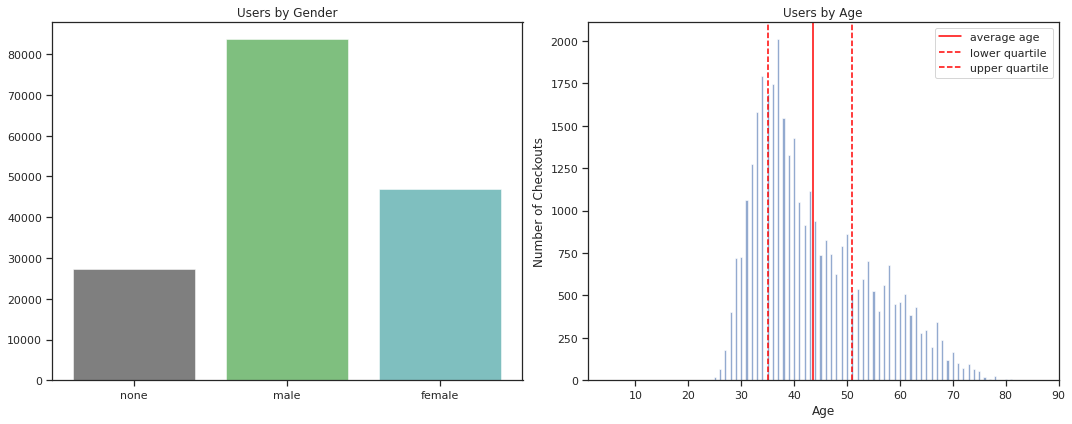

In [5]:
# matplotlib can create a plot with two sub-plots. 
# we will learn a lot about matplotlib 
fig, ax = plt.subplots(1, 2, figsize=(15, 6))


# find all the unique value of the column gender 
# numpy can do this
# we will learn a lot about numpy 
gender_counts = np.unique(hubway_data['gender'].values, return_counts=True)

ax[0].bar(range(3), gender_counts[1], align='center', color=['black', 'green', 'teal'], alpha=0.5)
ax[0].set_xticks([0, 1, 2])
ax[0].set_xticklabels(['none', 'male', 'female'])
ax[0].set_title('Users by Gender')



age_col = 2020.0 - hubway_data['birth_date'].dropna().values
age_counts = np.unique(age_col, return_counts=True)
ax[1].bar(age_counts[0], age_counts[1], align='center', width=0.4, alpha=0.6)
ax[1].axvline(x=np.mean(age_col), color='red', label='average age')
ax[1].axvline(x=np.percentile(age_col, 25), color='red', linestyle='--', label='lower quartile')
ax[1].axvline(x=np.percentile(age_col, 75), color='red', linestyle='--', label='upper quartile')
ax[1].set_xlim([1, 90])
ax[1].set_xlabel('Age')
ax[1].set_ylabel('Number of Checkouts')
ax[1].legend()
ax[1].set_title('Users by Age')

plt.tight_layout()
plt.savefig('who.png', dpi=300)

### Challenge
There is actually a mistake in the code above. Can you find it? 

Soon you will be skillful enough to answers many "who" questions

# Where? Where are bikes being checked out?
Refine into specific hypotheses:
1. More in Boston than Cambridge?
2. More in commercial or residential?
3. More around tourist attractions?



In [6]:
# using pandas again to read the station locations 
station_data = pd.read_csv(HUBWAY_STATIONS_FILE, low_memory=False)[['id', 'lat', 'lng']]
station_data.head()

,id,lat,lng
0,3,42.340021,-71.100812
1,4,42.345392,-71.069616
2,5,42.341814,-71.090179
3,6,42.361285,-71.065140
4,7,42.353412,-71.044624


In [7]:
# Sometimes the data is given to you in pieces and must be merged!
# we want to combine the trips data with the station locations. pandas to the rescue... 

hubway_data_with_gps = hubway_data.join(station_data.set_index('id'), on='strt_statn')
hubway_data_with_gps.head()

,seq_id,hubway_id,status,duration,start_date,strt_statn,end_date,end_statn,bike_nr,subsc_type,zip_code,birth_date,gender,lat,lng
336967,336968,382289,Closed,1133,7/12/2012 16:59:00,64.0,7/12/2012 17:18:00,40.0,B00177,Registered,'02339,1959.0,Male,42.351100,-71.049600
1228655,1228656,1375284,Closed,720,9/1/2013 18:31:00,36.0,9/1/2013 18:43:00,54.0,B00130,Casual,NaN,NaN,NaN,42.349673,-71.077303
1018544,1018545,1149209,Closed,780,7/17/2013 19:44:00,81.0,7/17/2013 19:57:00,53.0,T01324,Registered,'02115,NaN,Male,42.352409,-71.062679
139915,139916,157009,Closed,926,11/29/2011 14:17:00,57.0,11/29/2011 14:32:00,22.0,B00499,Casual,NaN,NaN,NaN,42.340799,-71.081572
1263342,1263343,1412424,Closed,900,9/9/2013 14:00:00,42.0,9/9/2013 14:15:00,55.0,B00076,Casual,NaN,NaN,NaN,42.352096,-71.070378


# <img style="width: 100%" alt="Heatmap" src="https://static.us.edusercontent.com/files/mRGDd7ddzN03xvXp4FZyKEc2">

OK - we cheated above and we skip some of the code which generated this plot. 

# When? When are the bikes being checked out?

Refine into specific hypotheses:
1. More during the weekend than on the weekdays?
2. More during rush hour?
3. More during the summer than the fall?



In [24]:
# Sometimes the feature you want to explore doesn’t exist in the data, and must be engineered!


# to find the time of the day we will use the start_date column and extrat the hours. 
# we use list comprehension
# we will be doing a lot of those
check_out_hours = hubway_data['start_date'].apply(lambda s: int(s[-8:-6]))

In [25]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))

check_out_counts = np.unique(check_out_hours, return_counts=True)
ax.bar(check_out_counts[0], check_out_counts[1], align='center', width=0.4, alpha=0.6)
ax.set_xlim([-1, 24])
ax.set_xticks(range(24))
ax.set_xlabel('Hour of Day')
ax.set_ylabel('Number of Checkouts')
ax.set_title('Time of Day vs Checkouts')

plt.show()

# Why? For what reasons/activities are people checking out bikes?

Refine into specific hypotheses:

1. More bikes are used for recreation than commute?
2. More bikes are used for touristic purposes?
3. Bikes are use to bypass traffic?

Do we have the data to answer these questions with reasonable certainty?
What data do we need to collect in order to answer these questions?


# How? Questions that combine variables.

1. How does user demographics impact the duration the bikes are being used? Or where they are being checked out?
2. How does weather or traffic conditions impact bike usage?
3. How do the characteristics of the station location affect the number of bikes being checked out?

How questions are about modeling relationships between different variables.


In [1]:
# Here we define the distance from a point as a python function. 
# We set Boston city center long and lat to be the default value.
# you will become experts in building functions and using functions just like this 

def haversine(pt, lat2=42.355589, lon2=-71.060175):
    """
    Calculate the great circle distance between two points 
    on the earth (specified in decimal degrees)
    """
    lon1 = pt[0]
    lat1 = pt[1]
    
    # convert decimal degrees to radians 
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])

    # haversine formula 
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a)) 
    r = 3956 # Radius of earth in miles
    return c * r

In [27]:
# use only the checkouts that we have gps location 
station_counts = np.unique(hubway_data_with_gps['strt_statn'].dropna(), return_counts=True)
counts_df = pd.DataFrame({'id':station_counts[0], 'checkouts':station_counts[1]})
counts_df = counts_df.join(station_data.set_index('id'), on='id')
counts_df.head()

In [28]:
# add to the pandas dataframe the distance using the function we defined above and using map 
counts_df.loc[:, 'dist_to_center'] = list(map(haversine, counts_df[['lng', 'lat']].values))
counts_df.head()

In [29]:
# we will use sklearn to fit a linear regression model 
# we will learn a lot about modeling and using sklearn
reg_line = LinearRegression()
reg_line.fit(counts_df['dist_to_center'].values.reshape((len(counts_df['dist_to_center']), 1)), counts_df['checkouts'].values)

# use the fitted model to predict 
distances = np.linspace(counts_df['dist_to_center'].min(), counts_df['dist_to_center'].max(), 50)


In [30]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))

ax.scatter(counts_df['dist_to_center'].values, counts_df['checkouts'].values, label='data')

ax.plot(distances, reg_line.predict(distances.reshape((len(distances), 1))), color='red', label='Regression Line')

ax.set_xlabel('Distance to City Center (Miles)')
ax.set_ylabel('Number of Checkouts')
ax.set_title('Distance to City Center vs Checkouts')
ax.legend()



# <font color='blue'> Notice all axis are labeled, we used legends and titles when necessary. Also notice we commented our code. </font>